***CH02. 사이킷런으로 시작하는 머신러닝***

# **01.사이킷런 소개와 특징**


- 사이킷런(scikit-learn)은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리이다.
- 최근에는 텐서플로, 케라스 등 딥러닝 전문 라이브러리의 강세로 대중적인 관심이 줄고있지만 여전히 많은 분석가가 의존하는 대표적인 파이썬 ML 라이브러리이다.

- 사이킷런(scikit-learn) 설치
```
# pip install scikit-learn
```
- 사이킷런(scikit-learn) 셋업 (임포트)
```
# import sklearn
```


In [ ]:
import sklearn
print(sklearn.__version__) # scikit-learn 버전 확인

0.22.2.post1


# **02. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기**


붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처를 기반으로 꽃의 품종을 예측하기 위한 것

* Sepal length
* Sepal width
* Petal length
* Petal width

- 사이킷런에서 사용할 모듈 임포트
1. sklearn.datasets 내의 모듈은 사이킷런에서 자체적으로 제공하는 데이터 세트 생성하는 모듈의 모임

2. sklearn.tree 내의 모듈은 트리 기반 ML 알고리즘을 구현한 클래스의 모임

3. sklearn.model_selection은 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임

> 하이퍼 파라미터란? : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭, 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있다.

- 붓꽃 데이터 세트를 생성하는데 load_iris()를 이용
- ML알고리즘은 의사 결정 트리(DecisionTreeClassifier) 적용

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

In [ ]:
# iris 데이터 세트를 로딩
iris = load_iris()

# iris.data는 iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 iris 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target 값 :',iris_label)
print('iris target 명 :',iris.target_names)

# iris 데이터 세트를 자세히 보기 위해 데이터프레임으로 변환
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target 값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- iris 데이터 세트를 학습데이터와 테스트데이터로 분리
> why? : 학습데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가 하려면 테스트데이터(검증데이터)가 필요하기 때문에
- test_size = 0.2 # 학습데이터 80%, 테스트데이터(검증데이터) 20%로 분리
- 첫번째 파라미터는 iris_data 피처 데이터 세트
- 두번째 파라미터는 iris_label 레이블 데이터 세트
- random_state = 11 # 호출할 때마다 같은 학습/테스트 용 데이터를 생성하기 위해 주어지는 난수 발생 값입니다.
- X_train,X_test,y_train,y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,iris_label,test_size = 0.2, random_state = 11)

- **데이터를 기반으로 머신러닝 분류 알고리즘의 하나인 의사 결정 트리를 이용해 학습과 예측을 수행**
- 사이킷런의 의사 결정 트리 클래스인 DecisionTreeClassifier를 객체로 생성
- 생성된 DecisionTreeClassifier 객체의 fit() 메서트에 학습용 피처 데이터 속성과 결정 값 데이터세트를 입력해 호출하면 학습을 수행

In [ ]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

- 생성된 DecisionTreeClassifier 객체의 fit() 메서드에 학습용 피처 데이터 속성과 결정 값 데이터 세트를 입력해 호출하면 학습을 수행

In [ ]:
# 학습 수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

- 학습이 완료된 DecisionTreeClassifier 객체를 이용해 예측을 수행
- 예측은 학습데이터가 아닌 다른데이터를 이용. 일반적으로는 테스트데이터를 사용 
- DecisionTreeClassifier 객체의 predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반으로 테스트데이터 세트에 대한 예측값을 반환하게 됩니다.

In [ ]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

In [ ]:
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

- 예측 결과를 기반으로 의사 결정 트리 기반의 DecisionTreeClassifier의 예측 성능을 평가
- 머신러닝 모델의 성능 평가 방법은 여러가지가 있으나, 여기서는 정확도를 측정해 본다.
- 예측한 붓꽃 품종과 실제 테스트 데이터 세트의 붓꽃 품종이 얼마나 일치하는지 확인
- 사이킷런은 정확도 측정을 위해 accuracy_score() 함수 제공.
- accuracy_score() 의 첫번째 파라미터는 실제 레이블 데이터 세트, 두번째 파라미터는 예측 레이블 데이터 세트 입력

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred)
print('예측 정확도 : {0:4f}'.format(acc))

예측 정확도 : 0.933333


##### **[ 정리 ]**
1. 데이터 세트 분리 : 데이터를 학습데이터와 테스트데이터로 분리
2. 모델 학습 : 학습데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습
3. 예측 수행 : 학습된 ML 모델을 이용해 테스트데이터의 분류(즉 붓꽃 품종)를 예측
4. 평가 : 이렇게 예측된 결과값과 테스트데이터의 실제 결과값을 비교해 ML 모델 성능을 평가

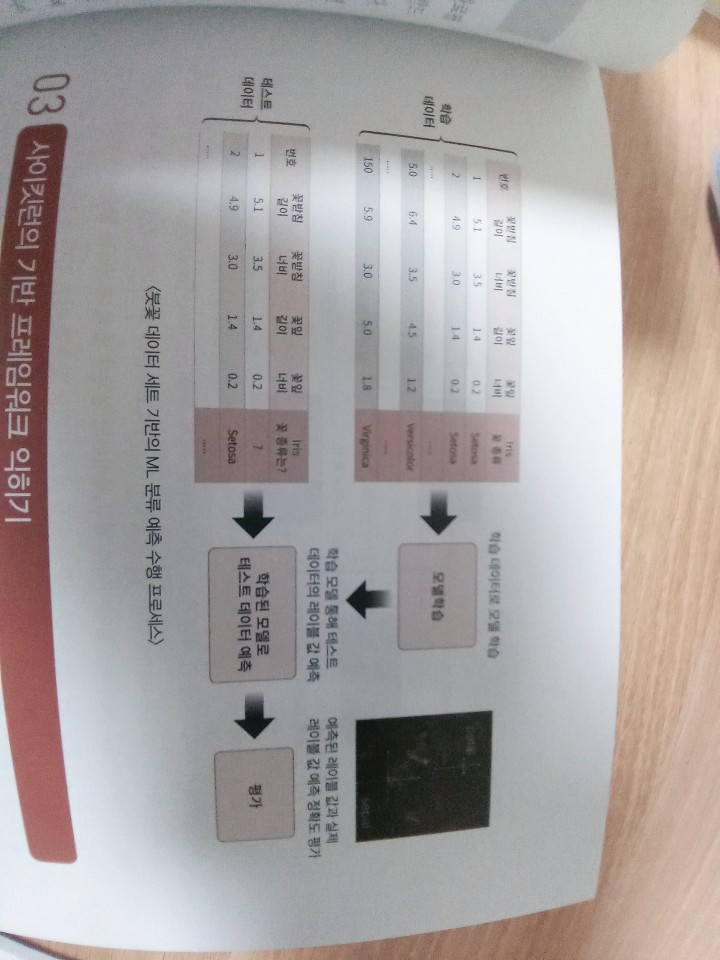

#**03. 사이킷런의 기반 프레임 워크 익히기**

**Estimator 이해 및 fit(), predict() 메서드**

- 사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공.
- 지도학습의 주요 두 축인 분류(Classification)와 회귀(Regression)의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과를 반환함.
- 분류 알고리즘을 구현한 클래스를 Classifier로, 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭함.
- Classifier와 Regressor를 합쳐서 Estimator 클래스라고 부릅니다. 즉 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Estimator라고 부름.
- 당연히 Estimator 클래스는 fit(), predict()를 내부에서 구현하고 있음
------------------------------------------------------------------------
- cross_val_score()와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator를 인자로 받습니다.
- 인자로 받은 Estimator에 대해서 cross_val_score(), GridSearchCV.fit() 함수 내에서 이 Estimator의 fit()과 predict()를 호출해서 평가를 하거나 하이퍼 파라미터 튜닝을 수행하는 것입니다.



# Estimator
  -> 학습 : fit()

  ->  예측 : predict()
- Classifier (분류)
  - 분류 구현 클래스
  1.DecisionTreeClassifier
  
  2.RandomForestClassifier
  
  3.GradientBoostingClassifier
  
  4.GaussianNB
  
  5.SVC
- Regressor (회귀)
  - 회귀 구현 클래스
  1.LinearRegression

  2.Ridge

  3.Lasso

  4.RandomForestRegressor
  
  5.GradientBoostingRegressor



- 사이킷런에서 비지도학습인 차원 축소, 클러스터링, 피처 추출(Feature Extraction) 등을 구현한 클래스 역시 대부분 fit(), transform()을 적용.

- 비지도학습과 피처 추출에서 fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업이다. fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행한다.

- 사이킷런은 fit()과 transform()을 하나로 결합한 fit_transform()도 제공함. fit_transform()은 fit()과 transform()을 별도로 호출할 필요를 줄여주지만, 사용에 있어 약간의 주의가 필요함.

###***사이킷런의 주요 모듈***

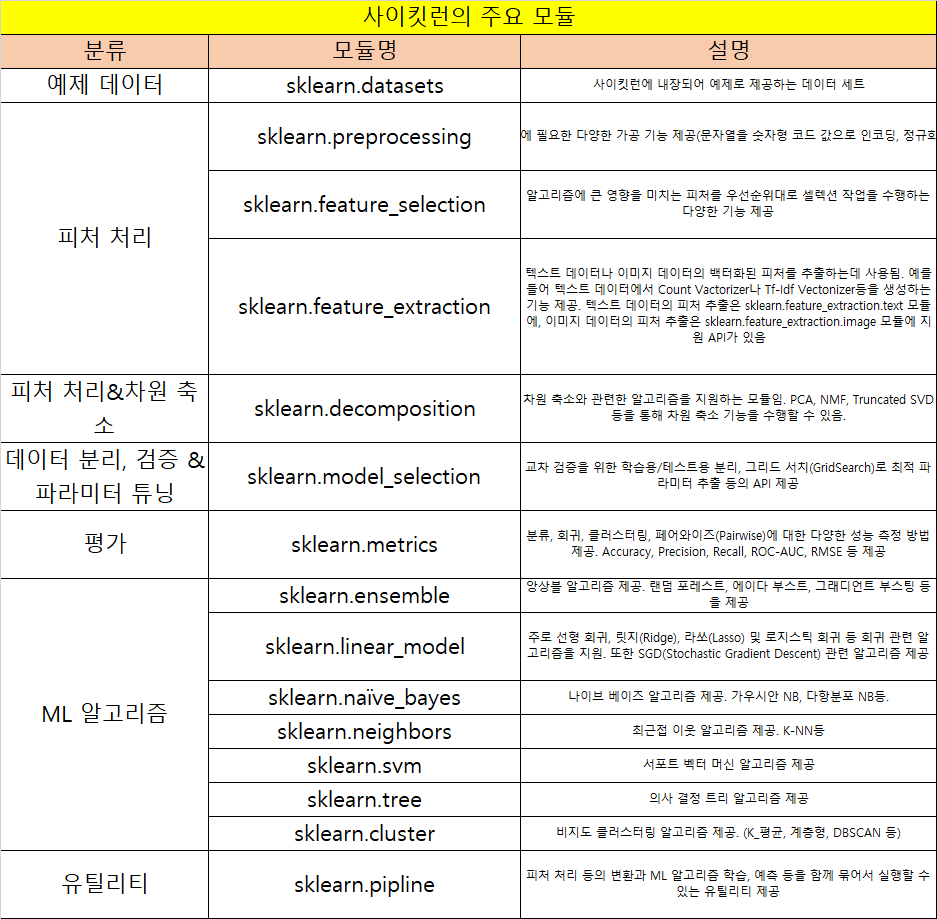

- 일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 피처의 가공, 변경, 추출을 수행하는 피처 처리(feature processing), ML 알고리즘 학습/예측 수행, 그리고 모델 평가의 단계를 반복적으로 수행하는 것

#####**내장된 예제 데이터 세트**

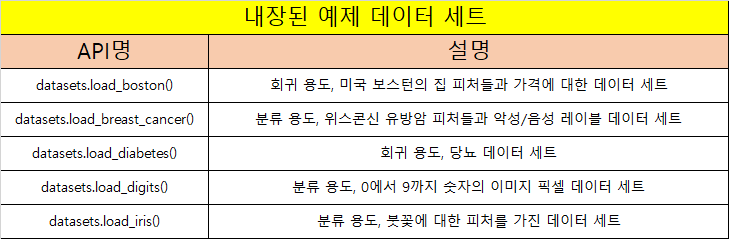

######**분류와 클러스터링을 위한 표본 데이터 생성기**
- datasets.make_classifications() : 분류를 위한 데이터 세트를 만듬
- datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위로 생성해줌

분류나 회귀를 위한 연습용 예제 데이터가 어떻게 구성돼 있는지 좀 더 살펴보겠습니다. 사이킷런에 내장된 이 데이터 세트는 일반적으로 딕셔너리 형태로 돼 있습니다.

키(key)는 보통 data, target, target_name, feature_names, DESCR로 구성돼있습니다.

- data는 피처의 데이터 세트를 가리킴
- target은 분류 시 레이블 값, 회귀일 때는 숫자 결과값 데이터 세트 입니다.
- target_names는 개별 레이블의 이름을 나타냄
- feature_names는 피처의 이름을 나타냄
- DESCR은 데이터 세트에 대한 설명과 각 피처의 설명을 나타냄

>data, target은 넘파이 배열(ndarray)타입이며, target_names, feature_names는 넘파이 배열 또는 리스트(list) 타입, DESCR은 스트링 타입

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(type(iris_data)) # 결과 : sklearn.utils.Bunch 클래스는 파이썬 딕셔너리 자료형과 유사 (딕셔너리 형태의 값 반환)

<class 'sklearn.utils.Bunch'>


In [ ]:
keys = iris_data.keys()
print(keys) # 데이터 키는 피처들의 데이터 값을 가리킴

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

#**04. Model selection 모듈 소개**

**학습/테스트 데이터 세트 분리 - train_test_split()**

train_test_split() 파라미터
- test_size
- train_size
- shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정
- random_state : 동일한 학습/테스트 데이터를 생성하기 위해 난수 값

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.3, random_state = 121) # 테스트데이터 30% 학습데이터 70%

In [ ]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred = dt_clf.predict(X_test)

In [ ]:
print('예측 정확도 : {0:4f}'.format(accuracy_score(y_test,pred)))

예측 정확도 : 0.955556


## **교차검증**

- 앞의 내용 알고리즘을 학습시키는 학습 데이터와 이에 대한 에측 성능을 평가하기 위한 별도의 테스트용 데이터가 필요 <- 과적합 문제점 발생
- 과적합은 모델이 학습 데이터만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 과도하게 떨어지는 것을 말함
- 그런데 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향이 발생하게 됨. 결국 해당 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트 데이터가 들어올때는 성능 저하... <- 문제점 해결 : **교차검증**

교차 검증을 좀 더 간략히 설명하자면?
- ex) 수능을 치르기 전에 모의고사를 여러번 보는 것
- 즉 수능이 테스트 데이터 세트에 대해 평가하는 거라면 모의고사는 교차 검증에서 많은 학습과 검증 세트에서 알고리즘 학습과 평가를 수행하는 것
- 데이터는 이상치, 분포도, 다양한 속성값, 피처 중요도 등 여러가지 ML에 영향을 미치는 요소를 가지고있습니다.
- 특정 ML 알고리즘에서 최적으로 동작할 수 있도록 데이터를 선별해 학습한다면 실제 데이터 양식과는 많은 차이가 있을 것이고 결국 성능 저하가 이어짐
- 교차 검증은 이러한 데이터 편증을 막기 위해 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것

**K 폴드 교차 검증**
- 먼저 K개의 데이터 폴드 세트를 만들어서 K번 만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행
- K가 5이면 5번 교차 검증을 수행 -> 이 5개의 평가를 평균한 결과를 가지고 예측 성능 평가
- 먼저 데이터를 K등분하고 첫번째 반복에서는 처음부터 4개 등분을 학습 데이터 세트, 마지막 5번째 등분 하나를 검증 데이터 세트로 설정하고 학습 데이터 세트에서 학습 수행, 검증 데이터 세트에서 평가를 수행 두번째 반복에서도 비슷하게 (처음부터 3개 등분까지, 그리고 마지막 5번째 등분을 학습 데이터, 4번째 등분을 검증 데이터 세트로 설정) <- 이 수행을 k번 하는 것

- 사이킷런에서는 K폴드 교차 검증 프로세스를 구현하기 위해 KFold와 StratifiedKFold 클래스를 제공

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits = 5) # K=5
cv_accuracy = []
print('붓꽃 데이터 세트 크기 :',features.shape[0])

붓꽃 데이터 세트 크기 : 150


- KFold(n_split = 5)로 KFold 객체를 생성했으니 이제 생성된 KFold 객체의 split()를 호출해 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리합니다.
- 전체 붓꽃 데이터는 150개 따라서 학습용 데이터 세트는 이 중 4/5인 120개, 검증용 데이터 세트는 1/5인 30개로 분할
- KFold 객체는 split()을 호출하면 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환
- 반환된 인덱스를 기반으로 수행

In [ ]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  #학습 및 예측
  dt_clf.fit(X_train,y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  # 반복 시마다 정확도 측정하기 위해서
  accuracy = np.round(accuracy_score(y_test,pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기:{3}'.format(n_iter,accuracy,train_size,test_size))
  print('#{0} 검증 세트 인덱스: {1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도 :{0}'.format(np.mean(cv_accuracy)))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기:30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기:30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기:30
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기:30
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기:30
#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 :0.9


**Stratified KFold**
- Stratified KFold는 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K폴드 방식
- 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말합니다. (왜도, 첨도)?
- Stratified KFold는 K Fold가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우 이러한 문제를 해결
- **Stratified KFold는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배.**


In [ ]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [ ]:
n_iter = 0
kfold = KFold(n_splits=3)
for train_index,test_index in kfold.split(features):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('##교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n',label_train.value_counts())
  print('검증 레이블 데이터 분포:\n',label_test.value_counts())

##교차 검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
##교차 검증: 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
##교차 검증: 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


- 첫번째 교차 검증에서는 학습 레이블의 1,2 값이 각각 50개가 추출 검증 레이블의 0 값이 50개 추출. 따라서 학습 레이블은 1,2 밖에 없으므로 0의 경우를 전혀 예측 하지 못함. 이렇게 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결 <- Stratified KFold
- Stratified KFold 와 KFold 의 차이점 : Stratified KFold 는 레이블 분포도에 따라 학습/검증 데이터를 나누기에 split()메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트가 필요


In [ ]:
from sklearn.model_selection import StratifiedKFold

skt = StratifiedKFold(n_splits = 3)
n_iter = 0

for trian_index, test_index in skt.split(iris_df,iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('##교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포 :\n',label_train.value_counts())
  print('검증 레이블 데이터 분포 :\n',label_test.value_counts())

##교차 검증: 1
학습 레이블 데이터 분포 :
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    17
0    17
2    16
Name: label, dtype: int64
##교차 검증: 2
학습 레이블 데이터 분포 :
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    17
0    17
1    16
Name: label, dtype: int64
##교차 검증: 3
학습 레이블 데이터 분포 :
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    17
1    17
0    16
Name: label, dtype: int64


In [ ]:
df_clf = DecisionTreeClassifier(random_state=156)

skt = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

for train_index,test_index in skt.split(features, label):
  X_train,X_test = features[train_index], features[test_index]
  y_train,y_test = label[train_index], label[test_index]
  n_iter += 1
  dt_clf.fit(X_train,y_train)
  pred = dt_clf.predict(X_test)

  accuracy = np.round(accuracy_score(y_test, pred),4)
  train_size = train_index.shape[0]
  test_size = test_index.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter,accuracy,train_size,test_size))
  print('#{0} 검증 데이터 세트 인덱스: \n{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

print('\n## 교차 검증 정확도 :',np.round(cv_accuracy,4))
print('\n## 평균 검증 정확도 :',np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 데이터 세트 인덱스: 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 데이터 세트 인덱스: 
[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 데이터 세트 인덱스: 
[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증 정확도 : [0.98 0.94 0.98]

## 평균 검증 정확도 : 0.9666666666666667


> 일반적으로 분류(Classification)에서의 교차 검증은 KFold 가 아니라 Stratified KFold를 이용해서 교차 검증을 해야 합니다.
>> 회귀(Regression)에서는 Stratified KFold가 지원되지 않습니다. 이유는? : 회귀의 결정값은 이산형이 아니라 연속형이기에 결정값별로 분포를 정하는 의미가 없다.

**교차 검증보다 간편하게 제공해주는 사이킷런의 API -> cross_val_score()**

KFold
1. 폴드 세트를 설정하고
2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤
3. 반복적으로 학습과 예측을 수행하고 예측 성능을 반환했습니다.
- cross_val_score()는 이런 일련의 과정을 한꺼번에 수행해주는 API이다.

**cross_val_score(estimator, X ,y=None, scoting=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs') 이중 estimator, X, y, scoring, cv가 주요 파라미터입니다.**

- estimator는 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클레스인 regressor를 의미하고, X는 피처 데이터 세트, y는 레이블 데이터 세트, scoring은 예측 성능 평가 지표를 기술하며, cv는 교차 검증 폴드 수를 의미.
- cross_val_score() 수행 후 반환 값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환. cross_val_score()는 classifier가 입력되면 Stratified KFold 폴드 방식으로 레이블값의 분포에 따라 학습/테스트를 분할, 회귀인 경우는 KFold방식으로 분할

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf,data,label,scoring = 'accuracy',cv=3)
print('교차 검증별 정확도 :',np.round(scores,4))
print('평균 검증 정확도 :',np.round(np.mean(scores),4))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 0.9667


- 비슷한 API로 cross_validate()는 여러 개의 평가 지표를 반환할 수 있습니다. 또한 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공.(많이 사용 안하므로 알아만 두기)

**GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에**

- 하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조종해 알고리즘 예측 성능을 개선할 수 있다.
- 사이킷런은 GridSearchCV API를 이용해 분류 회귀와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공.
(Grid는 격자라는 뜻으로, 촘촘하게 파라미터를 입력하면서 테스트를 하는 방식)
- 예를 들면 결정 트리 알고리즘의 여러 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾고자 한다면 다음과 같이 파라미터의 집합을 만들고 이를 순차적으로 적용하면서 최적화를 수행할 수 있다.
```
# grid_parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}
```

- 하이퍼 파라미터는 순차적으로 적용되며, 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행 하면서 최적의 파라미터와 수행 결과를 도출할 수 있습니다.

순번, max_depth, min_samples_split

1,    1,         2

2,    1,         3

3,    2,         2

4,    2,         3

5,    3,         2

6,    3,         3

- GridSearchCV는 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해준다.
- GridSearchCV는 사용자가 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트 하면서 최적의 파라미터를 편리하게 찾게 해주지만, 동시에 순차적으로 파라미터를 테스트 하므로 수행시간이 상대적으로 오래 걸리는 단점이 있다.
- 만약 CV가 3회라면 개별 파라미터 조합마다 3개의 폴딩 세트를 3회에 걸쳐 학습/평가해 평균값으로 성능을 측정. 예시) 6개의 파라미터 조합이라면 총 CV 3회 X 6개 파라미터 조합 = 18회의 학습/평가가 이루어짐

- GridSeachCV 클래스의 생성자로 들어가는 주요 파라미터
  - estimator : classifier, regressor, pipeline이 사용
  - param_grid : key+리스트 값을 가지는 딕셔너리가 주어진다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정합니다.
  - scoring : 예측 성능을 측정할 평가 방법을 지정. 보통은 사이킷런 성능 평가 지표를 지정하는 문자열(예:정확도의 경우 'accuracy')로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있다.
  - cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정
  - refit : 디폴트가 True 이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습 시킨다.

In [ ]:
# DecisionTreeClassifier의 중요 하이퍼 파라미터인 max_depth, min_samples_split의 값을 변화시키면서 최적화 진행
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=21)

dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}

In [ ]:
import pandas as pd

# param_grid의 하이퍼 파라미터 3개의 train,test set fold로 나누어 테스트 수행 설정,
### refit = True가 deafult임. True이면 가장 좋은 파라미터를 설정으로 재학습 시킴
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터 순차적으로 학습/평가
grid_dtree.fit(X_train,y_train)

# GridSearchCV 결과를 추출하여 데이터 프레임으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.683333,5,0.700,0.675,0.675
1,"{'max_depth': 1, 'min_samples_split': 3}",0.683333,5,0.700,0.675,0.675
2,"{'max_depth': 2, 'min_samples_split': 2}",0.975000,3,0.950,0.975,1.000
3,"{'max_depth': 2, 'min_samples_split': 3}",0.975000,3,0.950,0.975,1.000
4,"{'max_depth': 3, 'min_samples_split': 2}",0.991667,1,0.975,1.000,1.000
5,"{'max_depth': 3, 'min_samples_split': 3}",0.991667,1,0.975,1.000,1.000


In [ ]:
# GridSearchCV 객체와 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params, best_score_ 속성에 기록(즉, cv_results_의 rank_test_score가 1일때의 값)
print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.991667


In [ ]:
# refit = True이면 GridSearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_로 저장
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
from sklearn.metrics import accuracy_score
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도:{0:4f}',format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도:{0:4f} 0.9333333333333333


#**05. 데이터 전처리**

- 결측치 처리
- 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용 x -> 모든 문자열은 인코딩해서 숫자 형으로 변환해야 함
- 불필요한 피처는 삭제 등

**데이터 인코딩**
1. 레이블 인코딩
2. 원 핫 인코딩

레이블 인코딩
- 카테고리 피처를 코드형 숫자 값으로 변환하는 것
- ex) 상품데이터 TV, 냉장고, 전자레인지 값으로 돼있다면 TV:1, 냉장고:2, 전자레인지:3 숫자형 값으로 변환
- 주의해야될점 : 01 02 와 같은 코드 값 역시 문자열이므로 1,2 와 같은 숫자형 값으로 변환 해야됨
- 사이킷런 레이블 인코딩은 LabelEncoder 클래스로 구현함
- LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩을 수행

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체 생성 후 fit(), transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 :',labels)


인코딩 변환값 : [0 1 4 5 3 3 2 2]


In [ ]:
print('인코딩 클래스 :',encoder.classes_) # LabelEncoder 객체의 classes_ 속성값으로 확인

인코딩 클래스 : ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


- inverse_transform()을 통해 인코딩된 값을 다시 디코딩할 수 있다.

In [ ]:
print('디코딩 원본값 :',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값 : ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


**원 핫 인코딩**
- 원 핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 공 값에 해당하는 컬럼에만 1을 표시하고 나머지는 0을 표시하는 방식
- 원-핫 인코딩은 사이킷런에서 OneHotEncoder 클래스로 쉽게 변환이 가능.
- 주의할 점 : 첫번째는 OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼어야 하고, 두번째는 입력 값으로 2차원 데이터가 필요

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자형으로 변환을 위해 LabelEncoder 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환
labels_2d = labels.reshape(-1,1) # reshape(-1,1) 2차원으로 변환시켜줌 이 형태 기억하기

# 원 핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels_2d)
oh_labels = oh_encoder.transform(labels_2d)
print('원 핫 인코딩 데이터')
print(oh_labels.toarray())
print('원 핫 인코딩 데이터 차원')
print(oh_labels.shape)

원 핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원 핫 인코딩 데이터 차원
(8, 6)


- 판다스에는 원 핫 인코딩을 더 쉽게 지원하는 API가 있습니다 -> get_dummies()
- 사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자형으로 변환할 필요 없이 바로 변환

In [ ]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


**피처 스케일링과 정규화**

- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 한다.
- 대표적인 방법으로는 표준화(Standardization)과 정규화(Normalization)가 있다.
- 사이킷런에서 제공하는 대표적인 피처 스케일링 클래스인 StandardScaler와 MinMaxScaler를 알아보겠습니다.

**StandardScaler**
- 개별 피처를 평균이 0이고 분산이 1인 값으로 변환
- 가우시안 정규 분포를 가질 수 있도록 데이터롤 변환하는 것이 몇몇 알고리즘에서 중요! (특히 사이킷런에서 구현한 RBF 커널을 이용한 서포트 벡터 머신, 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있다.


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 생성 -> 데이터 프레임으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print(iris_df.mean())
print(iris_df.var())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [ ]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

# StandarScaler 객체 생성
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaler = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 넘파이 배열로 반환돼 이를 데이터 프레임으로 다시 변환
iris_df_scaled = pd.DataFrame(data = iris_scaler, columns = iris.feature_names)
print(iris_df_scaled.mean())
print(iris_df_scaled.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- 모든 컬럼 값의 평군이 0에 아주 가까운 값으로, 분산이 1에 아주 가까운 값으로 변환됐음을 알 수 있다.

**MinMaxScaler**
- MinMaxScaler는 데이터 값을 0과 1사이의 범위 값으로 변환(음수값이 있으면 -1에서 1로 변환).
- 데이터의 분포가 가우시안 분포가 아닐경우에 Min, Max Scale을 적용해 볼 수 있다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 넘파이 배열로 반환돼 이를 다시 데이터 프레임으로 변환 시켜줘야됨
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print(iris_df_scaled.min())
print(iris_df_scaled.max())

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


- 모든 피처에 0에서 1사이의 값으로 변환되는 스케일이 적용됐음을 알 수 있다.

**학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점**
- 즉 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있습니다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습데이터는 0~10 테스트데이터는 0~5 값을 가지는 데이터 생성
train_data = np.arange(11).reshape(-1,1)
test_data = np.arange(6).reshape(-1,1)

# MinMaxSacler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_data 데이터 최솟값이 0 최댓값이 10으로 설정
scaler.fit(train_data)

# 1/10 scale로 train_data 데이터 변환함. 원본 10 -> 1로 변환됨.
train_scaled = scaler.transform(train_data)

print('원본 train_data 데이터 :',np.round(train_data.reshape(-1),2))
print('Scale된 train_data 데이터 :',np.round(train_scaled.reshape(-1),2))


원본 train_data 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_data 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
# 테스트 데이터도 마찬가지

scaler.fit(test_data)
test_scaled = scaler.transform(test_data)

print('원본 test_data 데이터 :',np.round(test_data.reshape(-1),2))
print('Scale된 test_data 데이터 :',np.round(test_scaled.reshape(-1),2))

원본 test_data 데이터 : [0 1 2 3 4 5]
Scale된 test_data 데이터 : [0.  0.2 0.4 0.6 0.8 1. ]


- 출력 결과를 확인하면 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음을 확인할 수 있다.
- 따라서 테스트 데이터에 다시 fit()을 적용해서는 안되며, 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 함.


In [ ]:
# [올바른 예시]
scaler = MinMaxScaler()

# fit()하게 되면 train_data 데이터 최솟값이 0 최댓값이 10으로 설정
scaler.fit(train_data)

# 1/10 scale로 train_data 데이터 변환함. 원본 10 -> 1로 변환됨.
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

print('원본 train_data 데이터 :',np.round(train_data.reshape(-1),2))
print('Scale된 train_data 데이터 :',np.round(train_scaled.reshape(-1),2))
print('='*50)
print('원본 test_data 데이터 :',np.round(test_data.reshape(-1),2))
print('Scale된 test_data 데이터 :',np.round(test_scaled.reshape(-1),2))

원본 train_data 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_data 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_data 데이터 : [0 1 2 3 4 5]
Scale된 test_data 데이터 : [0.  0.1 0.2 0.3 0.4 0.5]


**[정리]**
>1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
>2. 1이 여의치 않다면 테스트 데이터 변환시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환

#**06. 사이킷런으로 수행하는 타이타닉 생존자 예측**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
print('Sex 값 분포:\n',titanic_df['Sex'].value_counts())
print('Cabin 값 분포:\n',titanic_df['Cabin'].value_counts())
print('Embarked 값 분포:\n',titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64
Cabin 값 분포:
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
F33              3
              ... 
C70              1
T                1
C104             1
B19              1
B41              1
Name: Cabin, Length: 148, dtype: int64
Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [ ]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

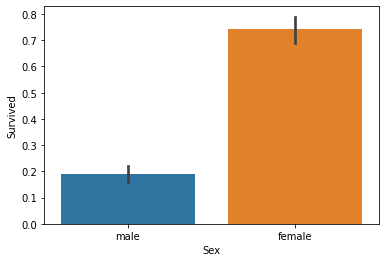

In [ ]:
sns.barplot(x='Sex',y='Survived',data = titanic_df)

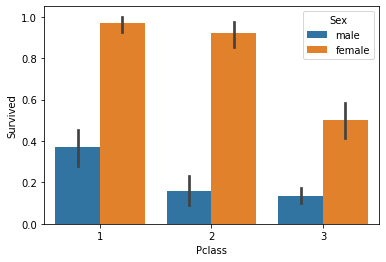

In [ ]:
sns.barplot(x='Pclass',y='Survived',hue = 'Sex',data=titanic_df)

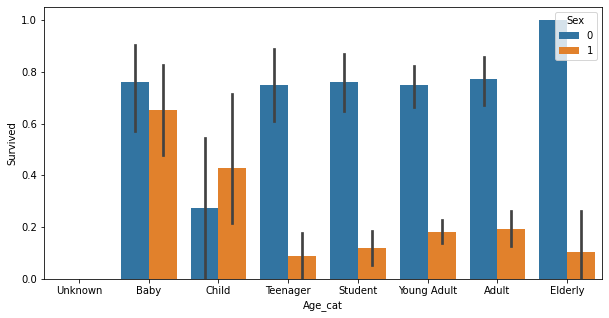

In [ ]:
def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown'
  elif age <=5: cat = 'Baby'
  elif age <=12: cat = 'Child'
  elif age <=18: cat = 'Teenager'
  elif age <=25: cat = 'Student'
  elif age <=35: cat = 'Young Adult'
  elif age <=60: cat = 'Adult'
  else: cat = 'Elderly'

  return cat

plt.figure(figsize = (10,5))

group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived',hue = 'Sex', data = titanic_df, order = group_names)
#titanic_df.drop('Age',axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin','Embarked','Sex','Age_cat']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,6


In [ ]:
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)
  return df

titnaic_df = drop_features(titanic_df)

In [ ]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test  = train_test_split(X_titanic_df, y_titanic_df, test_size= 0.2, random_state = 11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=11)
rt_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test,dt_pred)
print('DecisionTreeClassifier 정확도 :',dt_acc)

rt_clf.fit(X_train,y_train)
rt_pred = rt_clf.predict(X_test)
rt_acc = accuracy_score(y_test,rt_pred)
print('RandomForestClassion 정확도 :',rt_acc)

lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 :{0:4f}'.format(accuracy_score(y_test,pred)))

DecisionTreeClassifier 정확도 : 0.8044692737430168
RandomForestClassion 정확도 : 0.8659217877094972
LogisticRegression 정확도 :0.860335


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
  kfold = KFold(n_splits = folds)
  scores = []
  for iter_count, (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
    X_train,X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
    y_train,y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도:{1:4f}'.format(iter_count,accuracy))
  mean_score = np.mean(accuracy)
  print('평균 검증 정확도:{0:4f}'.format(mean_score))

exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도:0.731844
교차 검증 1 정확도:0.769663
교차 검증 2 정확도:0.792135
교차 검증 3 정확도:0.769663
교차 검증 4 정확도:0.814607
평균 검증 정확도:0.814607


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:4f}'.format(iter_count,accuracy))

print('평균 검증 정확도',np.mean(scores))

교차 검증 0 정확도: 0.765363
교차 검증 1 정확도: 0.758427
교차 검증 2 정확도: 0.808989
교차 검증 3 정확도: 0.792135
교차 검증 4 정확도: 0.820225
평균 검증 정확도 0.7890276818780995


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf,param_grid=parameters, scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 {0:4f}:'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dprediction = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dprediction)
print('테스트 세트에서 최고 정확도 {0:4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 0.799183:
테스트 세트에서 최고 정확도 0.871508
